# **Introduzione al Machine Learning -- laboratorio 21--22**

* Regressione logistica
* Regressione logistica con più di 2 categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('body.xlsx', index_col=0)
df.head()

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


Task: prevedere il sesso, usando alcune delle altre variabili.

In [5]:
df.columns

Index(['Biacromial diameter (see Fig. 2)',
       'Biiliac diameter, or "pelvic breadth" (see Fig. 2)',
       'Bitrochanteric diameter (see Fig. 2)',
       'Chest depth between spine and sternum at nipple level,',
       'Chest diameter at nipple level, mid-expiration',
       'Elbow diameter, sum of two elbows',
       'Wrist diameter, sum of two wrists', 'Knee diameter, sum of two knees',
       'Ankle diameter, sum of two ankles',
       'Shoulder girth over deltoid muscles',
       'Chest girth, nipple line in males and just above breast',
       'Waist girth, narrowest part of torso below the rib cage,',
       'Navel (or "Abdominal") girth at umbilicus and iliac crest,',
       'Hip girth at level of bitrochanteric diameter',
       'Thigh girth below gluteal fold, average of right and left',
       'Bicep girth, flexed, average of right and left girths',
       'Forearm girth, extended, palm up, average of right and',
       'Knee girth over patella, slightly flexed position, 

In [11]:
input_vars = df.columns[-4:-1]
input_vars

Index(['Age (years)', 'Weight (kg)', 'Height (cm)'], dtype='object')

In [12]:
X = df[input_vars]
X.head()

,Age (years),Weight (kg),Height (cm)
Id,,,
1,21,65.6,174.0
2,23,71.8,175.3
3,28,80.7,193.5
4,23,72.6,186.5
5,22,78.8,187.2


In [14]:
y = df['Gender (1 - male, 0 - female)']
y

Id
1      1
2      1
3      1
4      1
5      1
      ..
503    0
504    0
505    0
506    0
507    0
Name: Gender (1 - male, 0 - female), Length: 507, dtype: int64

Proviamo con scikit-learn.

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

# Attenzione che di default usa un po' di regolarizzazione L2

In [18]:
# Sarebbe più corretto separare un sottoinsieme casuale di validazione

model.score(X, y) # Accuracy

0.8481262327416174

In [19]:
model.coef_

array([[0.02176022, 0.09655943, 0.20372239]])

In [20]:
model.intercept_

array([-42.21120536])

In [25]:
pred_logits = X @ model.coef_.T + model.intercept_ # I cosiddetti "logits"
pred_logits

,0
Id,
1,0.027754
2,0.934782
3,5.610710
4,3.293721
5,4.013235
...,...
503,1.309811
504,-2.903231
505,-4.062141


In [26]:
# mi serve la "sigmoide logista"

sigmoid = lambda x: 1/(1 + np.exp(-x))

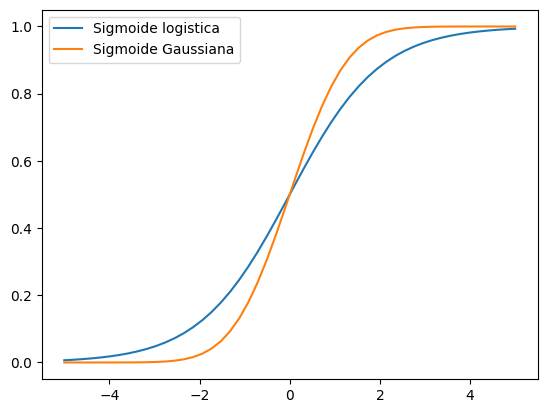

In [36]:
from scipy.stats import norm

xrange = np.linspace(-5, 5)
plt.plot(xrange, sigmoid(xrange), label='Sigmoide logistica')
plt.plot(xrange, norm.cdf(xrange), label='Sigmoide Gaussiana')
# plt.title('Sigmoide logistica')
plt.legend()
plt.show()

In [37]:
sigmoid(pred_logits) # Probabilità che y=1

,0
Id,
1,0.506938
2,0.718045
3,0.996355
4,0.964213
5,0.982246
...,...
503,0.787481
504,0.051994
505,0.016921


Provo a fare la stessa cosa "a mano".

In [39]:
# Aggiungo la dummy variable x0=1

X.insert(0, 'const', 1)
X.head()

,const,Age (years),Weight (kg),Height (cm)
Id,,,,
1,1,21,65.6,174.0
2,1,23,71.8,175.3
3,1,28,80.7,193.5
4,1,23,72.6,186.5
5,1,22,78.8,187.2


In [45]:
# Inizializzo B con un vettore casuale

B = np.random.randn(X.shape[-1]) * 0.001
X @ B # Controllo che la scala di B non produca logits troppo lontani da 0

Id
1      0.066033
2      0.072556
3      0.084885
4      0.072997
5      0.075270
         ...   
503    0.081057
504    0.060049
505    0.072960
506    0.083518
507    0.091173
Length: 507, dtype: float64

In [54]:
# Modo numericamente non ottimale di calcolare la loss
def loss_unstable(B, X, y):
  logits = X @ B
  probs = sigmoid(logits)
  loss = -y * np.log(probs) -(1-y) * (np.log(1-probs))
  return loss.mean()

In [55]:
loss_unstable(B, X, y)

0.691421100295144

In [88]:
# Provo a minimizzare

from scipy.optimize import minimize

sol = minimize(loss_unstable, x0=B, args=(X, y))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.3335595466014508
        x: [-4.223e+01  2.177e-02  9.656e-02  2.038e-01]
      nit: 31
      jac: [ 2.980e-08  1.661e-06  1.725e-06  5.703e-06]
 hess_inv: [[ 1.003e+04 -7.905e+00  5.821e-01 -5.744e+01]
            [-7.905e+00  1.030e-01 -1.494e-02  3.395e-02]
            [ 5.821e-01 -1.494e-02  1.266e-01 -5.117e-02]
            [-5.744e+01  3.395e-02 -5.117e-02  3.503e-01]]
     nfev: 175
     njev: 35

In [70]:
[model.intercept_.item()] + list(model.coef_.flatten())

[-42.211205355905086,
 0.02176022332385876,
 0.0965594292438696,
 0.20372239351060786]

In [80]:
# Provo con tutte le variabili

input_vars = df.columns[:-1]
X_large = df[input_vars]
model_large = LogisticRegression().fit(X_large, y)
model_large.score(X_large, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [75]:
model_large.intercept_

array([-0.05124973])

In [76]:
model_large.coef_

array([[ 0.6918253 , -0.51186367,  0.15240151,  0.2928184 , -0.48773005,
         0.92422422,  0.4003447 , -0.71665363,  1.05138447,  0.00501028,
         0.09280148,  0.34847228, -0.43515616, -0.27379407, -0.91838112,
         0.21834759,  0.73894882, -0.42320135, -1.13112263,  0.60252983,
        -0.00127299, -0.02297613,  0.67579727,  0.15243445]])

In [81]:
X_large.insert(0, 'const', 1)
B_large = np.random.randn(X_large.shape[-1]) * 0.001
loss_unstable(B_large, X_large, y)


0.7120732061117725

In [83]:
sol = minimize(loss_unstable, x0=B_large, args=(X_large, y))
sol

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/pyt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.537284405618439e-08
        x: [-6.497e+00  6.304e+01 ...  6.587e+01  1.446e+01]
      nit: 51
      jac: [ 3.535e-08  1.326e-06 ...  2.292e-06  6.023e-06]
 hess_inv: [[ 4.135e+06 -4.006e+07 ... -4.181e+07 -9.209e+06]
            [-4.006e+07  3.881e+08 ...  4.051e+08  8.922e+07]
            ...
            [-4.181e+07  4.051e+08 ...  4.228e+08  9.313e+07]
            [-9.209e+06  8.922e+07 ...  9.313e+07  2.051e+07]]
     nfev: 1488
     njev: 57

In [84]:
# Versione stabile della loss

softplus = lambda x: np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)

def loss(B, X, y):
  logits = X @ B
  # probs = sigmoid(logits)
  loss = y * softplus(-logits) +(1-y) * softplus(logits)
  return loss.mean()

In [89]:
loss(sol.x, X, y)

0.3335595466014508

In [90]:
loss_unstable(sol.x, X, y)

0.3335595466014508

In [91]:
sol_large = minimize(loss, x0=B_large, args=(X_large, y))
sol_large

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.8900352861820135e-08
        x: [-7.080e+00  6.890e+01 ...  7.273e+01  1.608e+01]
      nit: 51
      jac: [ 3.890e-08  1.459e-06 ...  2.521e-06  6.624e-06]
 hess_inv: [[ 3.985e+06 -3.870e+07 ... -4.087e+07 -9.090e+06]
            [-3.870e+07  3.758e+08 ...  3.969e+08  8.827e+07]
            ...
            [-4.087e+07  3.969e+08 ...  4.191e+08  9.321e+07]
            [-9.090e+06  8.827e+07 ...  9.321e+07  2.073e+07]]
     nfev: 1482
     njev: 57

In [98]:
# Accuracy finale

np.mean((X_large @ sol_large.x > 0) == y)

1.0

Regressione logistica con più di due classi

In [99]:
!pip install ucimlrepo

In [117]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

In [118]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [119]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [120]:
X['Rings'] = y['Rings']
y = X['Sex']
X = X.drop(columns='Sex')
X.insert(0, 'const', 1)

In [121]:
X.head()

,const,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [122]:
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [123]:
# Codifico le y come one-hot

y = pd.get_dummies(y, dtype=int)
y.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [126]:
# B di shape (9, 3) in modo da avere 9 input e 3 output

B = np.random.randn(X.shape[-1], y.shape[-1]) * 0.1

X @ B

,0,1,2
0,0.175363,1.337926,1.691308
1,0.056987,0.666325,0.810203
2,0.112384,0.851118,1.025857
3,0.117979,0.925952,1.139259
4,0.054178,0.665636,0.808542
...,...,...,...
4172,0.150545,1.017627,1.235138
4173,0.142048,0.945150,1.110377
4174,0.153457,0.865225,0.994339
4175,0.155600,0.953909,1.105414


In [128]:
from scipy.special import softmax

softmax(X @ B, axis=1) # Somma 1 su ogni riga

array([[0.11426168, 0.36542251, 0.5203158 ],
       [0.20148966, 0.37058259, 0.42792776],
       [0.17901097, 0.37472081, 0.44626822],
       ...,
       [0.18670643, 0.3804313 , 0.43286227],
       [0.17220567, 0.38260312, 0.44519121],
       [0.15954003, 0.39451347, 0.44594651]])

In [134]:
def loss_ce_unstable(B, X, y):
  logits = X @ B
  probs = softmax(logits, axis=1)
  loss = np.sum(y * -np.log(probs), axis=1)

  return loss.mean()

In [135]:
loss_ce_unstable(B, X, y)

1.1834131127166683

In [137]:
# Minimize vuole che l'argomento della funzione sia di shape (27,) e non (9, 3)

def loss_helper(B_flat, X, y):
  return loss_ce_unstable(B_flat.reshape(X.shape[-1], y.shape[-1]), X, y)

In [138]:
sol_ce = minimize(loss_helper, x0=B.flatten(), args=(X, y))

In [139]:
sol_ce

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8545906414292673
        x: [-1.787e+00  1.064e+00 ... -7.981e-02  1.227e-01]
      nit: 170
      jac: [-6.482e-07  1.118e-07 ... -1.810e-06  1.252e-06]
 hess_inv: [[ 2.891e+02 -1.888e+02 ...  1.513e+00 -1.201e-01]
            [-1.888e+02  2.615e+02 ... -1.434e+00  3.200e+00]
            ...
            [ 1.513e+00 -1.434e+00 ...  1.949e+00  4.191e-01]
            [-1.201e-01  3.200e+00 ...  4.191e-01  1.277e+00]]
     nfev: 4900
     njev: 175

In [143]:
# Controlliamo la accuracy

logits_pred = X @ sol_ce.x.reshape(X.shape[-1], y.shape[-1])
logits_pred

,0,1,2
0,0.736507,0.536035,1.242346
1,-0.631032,1.664391,0.178007
2,0.461206,0.644840,0.468837
3,0.437239,0.505104,0.780661
4,-0.652257,1.615319,0.243176
...,...,...,...
4172,1.356554,-0.685530,1.225788
4173,0.761885,-0.023855,0.998890
4174,1.566395,-1.462803,1.494465
4175,1.089441,-0.538863,1.203555


In [153]:
sex_pred = np.argmax(logits_pred, axis=1)
sex_pred[0:30]

array([2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 2, 0, 0, 0, 2])

In [154]:
sex_y = np.argmax(y, axis=1)
sex_y[0:30]

array([2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 2])

In [156]:
np.mean(sex_pred == sex_y)

0.56236533397175

Provo a rifare l'ultima classificazione con pyTorch

In [161]:
import torch
import torch.nn as nn

Xt = torch.Tensor(X.drop(columns='const').values)
yt = torch.Tensor(y.values)

model = nn.Linear(Xt.shape[-1], yt.shape[-1])

In [162]:
model.weight

Parameter containing:
tensor([[-0.1159, -0.0675,  0.1528, -0.2458,  0.0520, -0.3528, -0.1100,  0.1259],
        [-0.3064,  0.0987,  0.1132, -0.3055,  0.0707,  0.0087,  0.2000,  0.0077],
        [-0.1051, -0.0810,  0.2021,  0.3195, -0.0177,  0.1087,  0.0661, -0.2988]],
       requires_grad=True)

In [163]:
model.weight.shape

torch.Size([3, 8])

In [164]:
model.bias

Parameter containing:
tensor([-0.1585,  0.1733, -0.2042], requires_grad=True)

In [172]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0005)

In [173]:
for epoch in range(1000):

    batchsize = yt.shape[0] # oppure minore
    running_loss = 0.0
    for i in range(yt.shape[0] // batchsize):
        # get the inputs; data is a list of [inputs, labels]
        inputs = Xt[(i*batchsize):((i+1)*batchsize)]
        labels = yt[(i*batchsize):((i+1)*batchsize)]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # prediction = model(x_test_scaled)
    # val_loss = criterion(prediction, testset.targets)
    # val_accuracy = int(torch.sum(testset.targets == prediction.argmax(axis=1)))/10000
    # print(f'[{epoch + 1}] validation loss: {val_loss:.3f} validation accuracy: {val_accuracy:.3f}')
    print(f'[{epoch + 1}] loss: {loss:.3f}')

print('Finished Training')

[1] loss: 0.876
[2] loss: 0.876
[3] loss: 0.876
[4] loss: 0.876
[5] loss: 0.876
[6] loss: 0.876
[7] loss: 0.876
[8] loss: 0.876
[9] loss: 0.876
[10] loss: 0.876
[11] loss: 0.876
[12] loss: 0.876
[13] loss: 0.876
[14] loss: 0.876
[15] loss: 0.876
[16] loss: 0.876
[17] loss: 0.876
[18] loss: 0.876
[19] loss: 0.876
[20] loss: 0.876
[21] loss: 0.876
[22] loss: 0.876
[23] loss: 0.876
[24] loss: 0.876
[25] loss: 0.876
[26] loss: 0.876
[27] loss: 0.876
[28] loss: 0.876
[29] loss: 0.876
[30] loss: 0.876
[31] loss: 0.876
[32] loss: 0.876
[33] loss: 0.876
[34] loss: 0.876
[35] loss: 0.876
[36] loss: 0.876
[37] loss: 0.876
[38] loss: 0.876
[39] loss: 0.876
[40] loss: 0.876
[41] loss: 0.876
[42] loss: 0.876
[43] loss: 0.876
[44] loss: 0.876
[45] loss: 0.876
[46] loss: 0.876
[47] loss: 0.876
[48] loss: 0.876
[49] loss: 0.876
[50] loss: 0.876
[51] loss: 0.876
[52] loss: 0.876
[53] loss: 0.876
[54] loss: 0.876
[55] loss: 0.876
[56] loss: 0.876
[57] loss: 0.876
[58] loss: 0.876
[59] loss: 0.876
[60] l

In [175]:
sex_torch = np.argmax(model(Xt).detach().numpy(), axis=1)
sex_torch[0:30]

array([2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2])

In [176]:
np.mean(sex_torch == sex_y)

0.5369882690926502